<a href="https://colab.research.google.com/github/ShubhamShaw01/StockMarketPrediction/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we are going to explore the idea of stock market prediction with using ml model like lstm (long-short term memory) Model .

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install yfinance
# !pip install datetime
# !pip install tensorflow
# !pip install sklearn
# !pip install keras

**Importing essential Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

**acquiring data**

In [3]:
# start = (datetime.today() - timedelta(days=15*365)).strftime('%Y-%m-%d')
end = datetime.today().strftime('%Y-%m-%d')
stock = 'TATAMOTORS.NS'
data = yf.download(stock,end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


***Data***

In [4]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,1991-01-02,15.690223,15.690223,15.045420,15.045420,0
1,1991-01-03,15.690223,15.690223,15.045420,15.045420,0
2,1991-01-04,15.690223,15.690223,15.690223,15.690223,0
3,1991-01-07,15.152886,15.260354,14.400616,14.615549,0
4,1991-01-08,15.152886,15.152886,15.152886,15.152886,0
...,...,...,...,...,...,...
8652,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179
8653,2025-04-07,579.750000,582.000000,535.750000,560.500000,49463598
8654,2025-04-08,588.849976,606.599976,584.200012,591.200012,20987855


In [5]:
total_missing_values = data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing_values}")

Total missing values in the dataset: 0


In [6]:
from sklearn.impute import KNNImputer

# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=np.number).columns
data_numerical = data[numerical_features]

# Suppose 'data' is your DataFrame and you wish to impute missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_imputed_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), columns=data_numerical.columns, index=data_numerical.index) # keep the original index

# Concatenate the imputed numerical features with the original 'Date' column
# Instead of overwriting 'data', create a new DataFrame or update existing columns.
# Here, I am updating the existing data DataFrame with the imputed values.
data.update(data_imputed_numerical) # keep original data, update it with the imputed values

print("Data after imputation:")
data

Data after imputation:


Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,1991-01-02,15.690223,15.690223,15.045420,15.045420,0
1,1991-01-03,15.690223,15.690223,15.045420,15.045420,0
2,1991-01-04,15.690223,15.690223,15.690223,15.690223,0
3,1991-01-07,15.152886,15.260354,14.400616,14.615549,0
4,1991-01-08,15.152886,15.152886,15.152886,15.152886,0
...,...,...,...,...,...,...
8652,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179
8653,2025-04-07,579.750000,582.000000,535.750000,560.500000,49463598
8654,2025-04-08,588.849976,606.599976,584.200012,591.200012,20987855


**Graph**

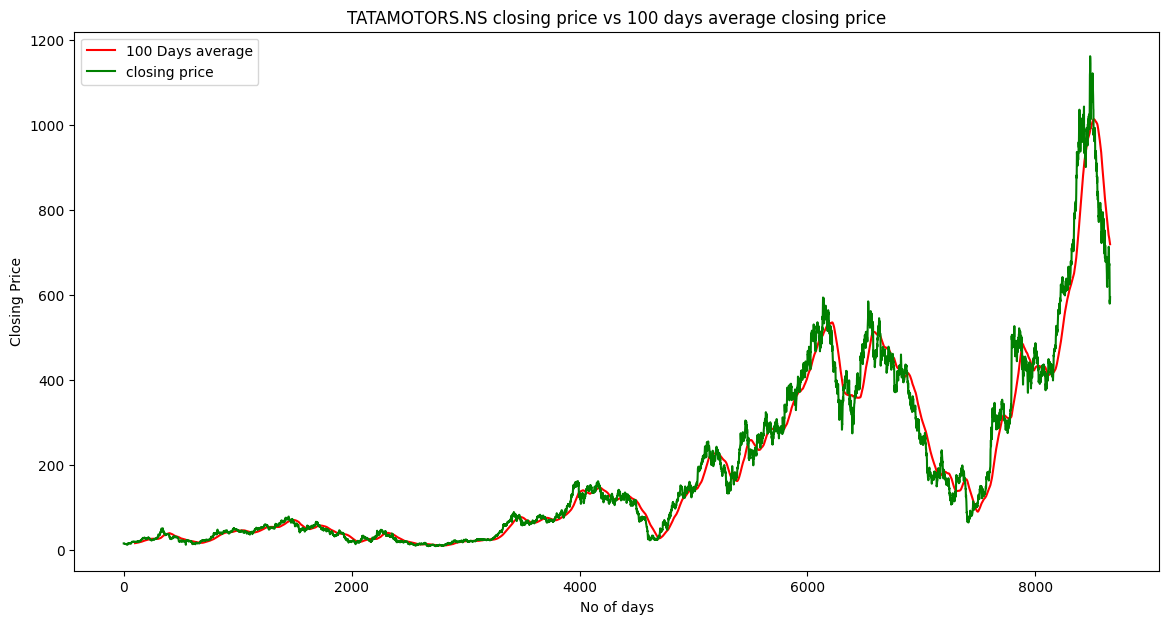

In [7]:
ma_100_days = data['Close'].rolling(100).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label="closing price")
plt.legend()
plt.xlabel("No of days")
plt.ylabel("Closing Price")
plt.title(f"{stock} closing price vs 100 days average closing price")
plt.show()

***checking with different no of dates***

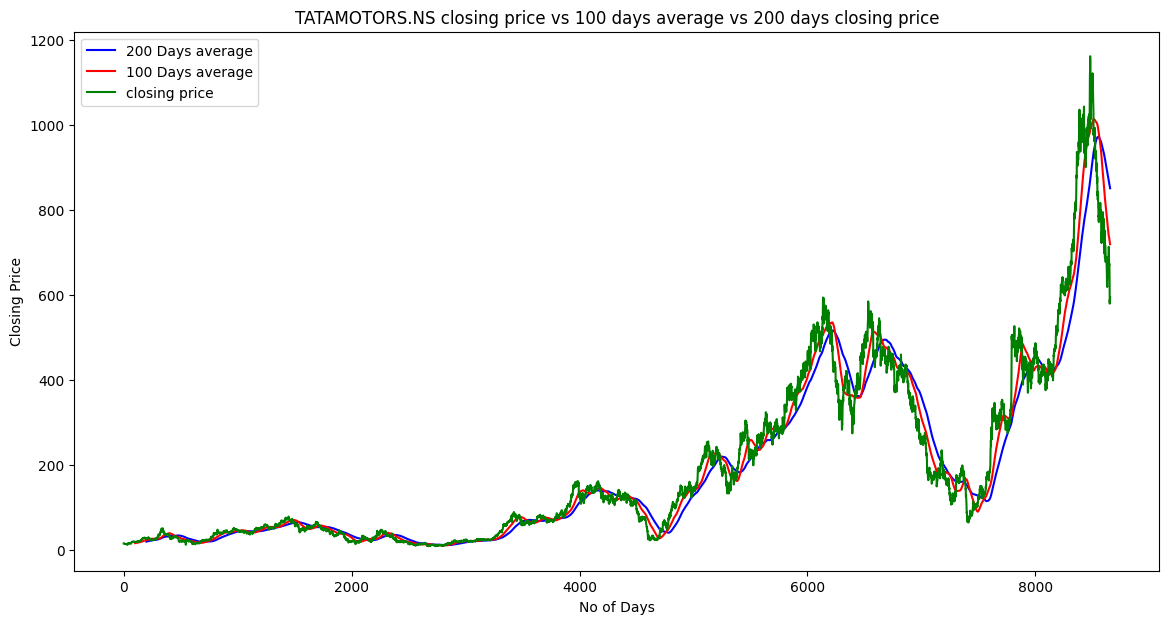

In [8]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_200_days,'b',label="200 Days average")
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label='closing price')
plt.legend()
plt.xlabel('No of Days')
plt.ylabel('Closing Price')
plt.title(f'{stock} closing price vs 100 days average vs 200 days closing price')
plt.show()

In [9]:
data.dropna(inplace=True)
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [10]:
data_train.shape[0]

6925

In [11]:
data_test.shape[0]

1732

importing sklearn

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_array=scaler.fit_transform(data_train)
x=[]
y=[]
for i in range(100,data_train_array.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)

importing sequential lstm model,dense and dropout from keras

In [13]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [14]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50,steps_per_epoch=15, batch_size=32,verbose =1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0808
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0016
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 0.0015 
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0016
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0016
Epoch 23/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014
Epoch 24/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018
Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012
Epoch 26/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015
Epoch 27/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013
Epoch 28/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013
Epoch 29/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.7986e-04
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 
Epo

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,705 (830.88 KB)

 Trainable params: 70,901 (276.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,804 (553.93 KB)

In [17]:
pas_100_days=data_train.tail(100)
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)
data_test_array=scaler.fit_transform(data_test)
x=[]
y=[]
for i in range(100,data_test.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)
y_predict=model.predict(x)
scale=1/scaler.scale_
y_predict=y_predict*scale
y=y*scale

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


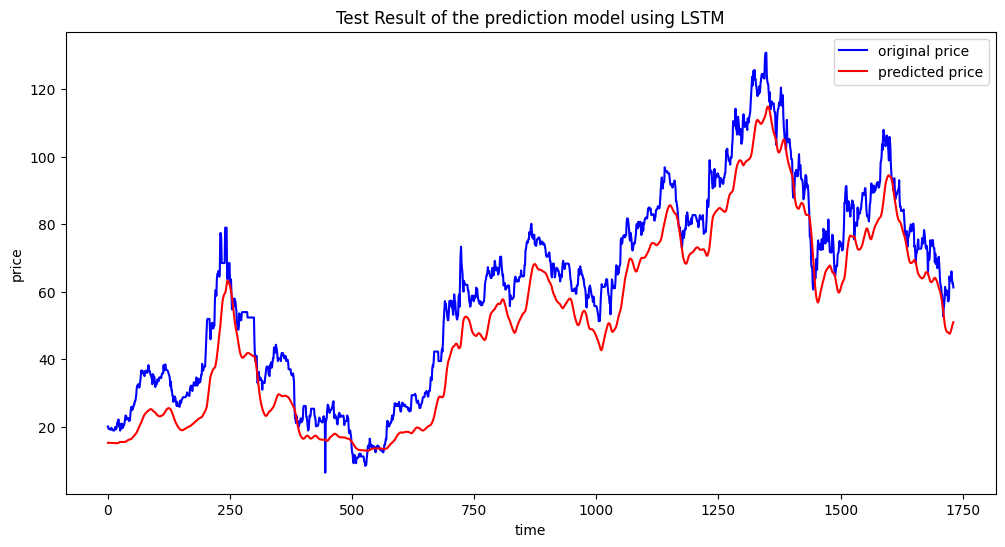

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y,'b',label='original price')
plt.plot(y_predict,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.title("Test Result of the prediction model using LSTM")
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

# Scale the test set data (30% of total data)
inputs = scaler.transform(data_test.values.reshape(-1, 1))

# Create sequences for predictions based on the test data
X_test = [inputs[i-100:i, 0] for i in range(100, len(inputs))]
X_test = np.array(X_test).reshape(-1, 100, 1)

# Model prediction for test data
predicted_test_price = model.predict(X_test)
predicted_test_price = scaler.inverse_transform(predicted_test_price)

# Calculate MAPE between actual and predicted prices
mape = mean_absolute_percentage_error(data_test.values[100:], predicted_test_price)

# Display accuracy
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

21/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Percentage Error (MAPE): 7.40%


In [20]:
# Scale the test dataset
inputs = scaler.transform(data_test.values.reshape(-1, 1))

# Prepare the test sequences
X_test = [inputs[i-100:i, 0] for i in range(100, len(inputs))]
X_test = np.array(X_test).reshape(-1, 100, 1)

# Predict on test sequences
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Predict the next 10 days
future_predictions = []
current_batch = inputs[-100:]  # Start with the last observed 100 timesteps
for _ in range(10):
    current_pred = model.predict(current_batch.reshape(1, 100, 1))  # Predict next value
    future_predictions.append(current_pred[0, 0])  # Append the prediction
    current_batch = np.append(current_batch[1:], current_pred, axis=0)  # Update batch

# Transform predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

21/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [21]:
Last_date = data['Date'].iloc[-1].strftime('%Y-%m-%d')
print("Index\tDate\t\tPredicted Closing Price")
for i in range(1,11):
    future_date = datetime.strptime(Last_date, '%Y-%m-%d') + pd.DateOffset(days=i)
    future_date
    print(f"{i}\t{future_date.strftime('%Y-%m-%d')}\t{future_predictions[i-1][0]}")

Index	Date		Predicted Closing Price
1	2025-04-12	604.66552734375
2	2025-04-13	597.4135131835938
3	2025-04-14	590.927490234375
4	2025-04-15	584.9797973632812
5	2025-04-16	579.4131469726562
6	2025-04-17	574.1195678710938
7	2025-04-18	569.0248413085938
8	2025-04-19	564.078369140625
9	2025-04-20	559.2456665039062
10	2025-04-21	554.5033569335938


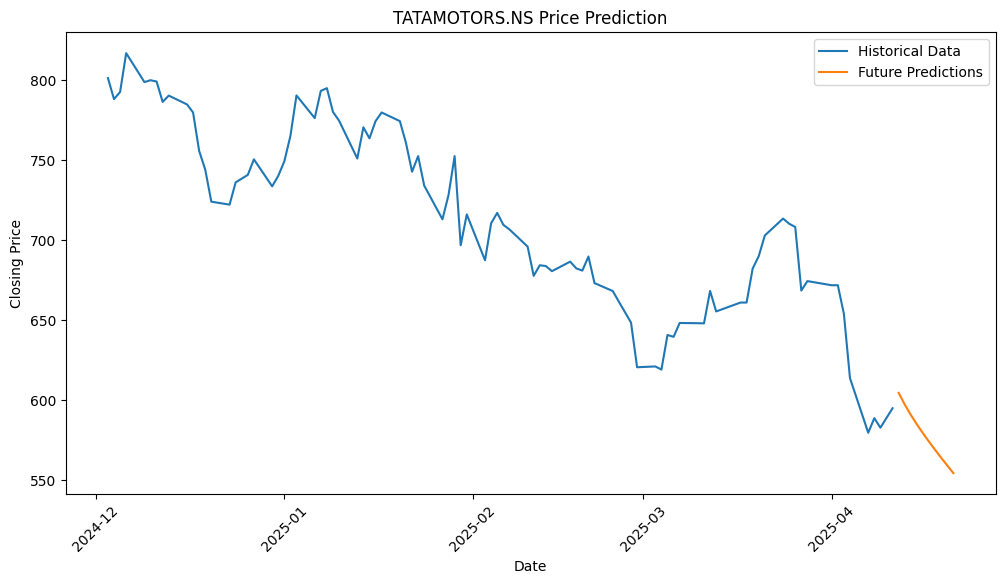

In [22]:
last_100_days_data = data.iloc[-90:]
future_dates = [data['Date'].iloc[-1] + pd.DateOffset(days=i) for i in range(1, 11)]
plt.figure(figsize=(12, 6))
plt.plot(last_100_days_data['Date'], last_100_days_data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{stock} Price Prediction")
plt.legend()
plt.xticks(rotation=45)
plt.show()